In [5]:
# A function to rate where vector c lies in the LHS of space of the plane (y_x).
# positive: left, negative: right
# Using hyperplane requires to find the orthogonal vector of the plane. Here
# instead we use cross product to identify left and right. The value is normalized
# for better comparison
def is_left(x, y, c):
    return np.cross((y - x)/np.linalg.norm(y - x), (c - x)/np.linalg.norm(c-x))

# As an improvement, we use numpy batch operations to fulfill the is_left
# function
def find_next(remain_points, found_points):
    # x: The current point
    x = found_points[-1]
    # The remain_points - current point, broadcasted to each vector in the array
    centered = remain_points - x
    for i in range(remain_points.shape[0]):
        # cross product, also a broadcasted operation
        cross = np.cross(remain_points[i] - x, centered)
        # if all the points are on the left or in the plane
        if (cross>=0).all() & (cross>0).any():
            # there could be several points fullfill the condition, we choose the furthest.
            same_direct = np.where(cross==0)
            same_direct_points = remain_points[same_direct]
            lengths = np.linalg.norm(same_direct_points - x, axis=1)
            return np.asarray(same_direct)[0][np.argmax(lengths)]


In [6]:
import numpy as np
l1 = np.array([[0,0], [7,0],[3,1],[5,2],[5,5], [3,3], [1,4], [9,6]])
l2 = np.array([[0,1],[1,0],[3,1],[2.5, 2], [1.5, 1], [1,3], [1.5, 1.5]])
l3 = np.array([[0.5, 0.5], [1,1], [0, 0.5], [1, 1.5], [0.5, 2], [1, 0.5]])
l4 = np.random.randn(200,2)


In [7]:
def left_corner(points):
    corner = points[np.where(points[:, 0] == np.amin(points, axis = 0)[0])]
    corner = corner[np.where(corner[:, 1] == np.amin(corner, axis = 0)[1])]
    return np.squeeze(corner)
left_corner(l3)


array([0. , 0.5])

In [8]:
def min_list(points):
    remain_points = np.array(points.copy())
    min_list_points = np.array([left_corner(points)])

    for i in range(points.shape[0]-1):
        index = find_next(remain_points, min_list_points)
        if ((min_list_points[0] == np.squeeze(remain_points[index])).all()):
            if i != 0: break
        min_list_points = np.vstack((min_list_points, remain_points[index]))
        remain_points = np.delete(remain_points, obj=index, axis=0)

    return min_list_points


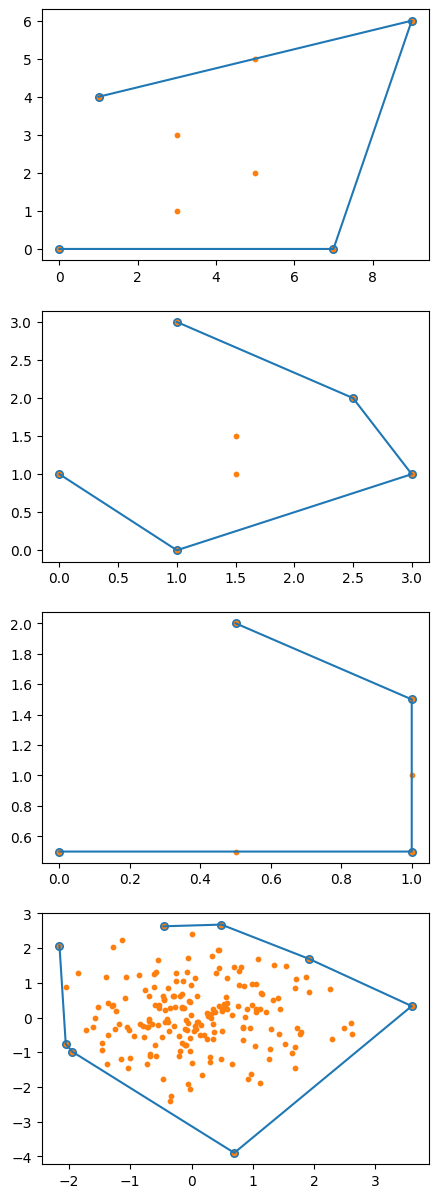

In [9]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(4, 1, figsize = (5, 15))
i = 0
for l in [l1, l2, l3, l4]:
    ax[i].plot(min_list(l)[:,0], min_list(l)[:, 1])
    ax[i].scatter(min_list(l)[:,0], min_list(l)[:, 1], s=30)
    ax[i].scatter(l[:,0], l[:,1], s = 10)
    i += 1


In [ ]:
def is_in_convex_hull():
